In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models
train_data_path = '/kaggle/input/facial-emotion-expressions/images/train/'
val_data_path = '/kaggle/input/facial-emotion-expressions/images/validation/'

x = 0
for expression in os.listdir(train_data_path):
    print(expression, ' ',len(os.listdir(train_data_path + expression)))
    x = x + len(os.listdir(train_data_path + expression))
print('Total Images are -->',x)

surprise   3205
fear   4103
angry   3993
neutral   4982
sad   4938
disgust   436
happy   7164
Total Images are --> 28821


In [11]:
x = 0
for expression in os.listdir(val_data_path):
    print(expression, ' ',len(os.listdir(val_data_path + expression)))
    x = x + len(os.listdir(val_data_path + expression))
print('Total Images are -->',x)

surprise   797
fear   1018
angry   960
neutral   1216
sad   1139
disgust   111
happy   1825
Total Images are --> 7066


In [12]:
emotions = []
x = 0
for expression in os.listdir(train_data_path):

    print(expression, ' ',len(os.listdir(train_data_path + expression)))
    data = [expression]
    x = x + len(os.listdir(train_data_path + expression))
    emotions.append(data)
print('Total Images are -->',x)

surprise   3205
fear   4103
angry   3993
neutral   4982
sad   4938
disgust   436
happy   7164
Total Images are --> 28821


In [13]:
emotions


[['surprise'],
 ['fear'],
 ['angry'],
 ['neutral'],
 ['sad'],
 ['disgust'],
 ['happy']]

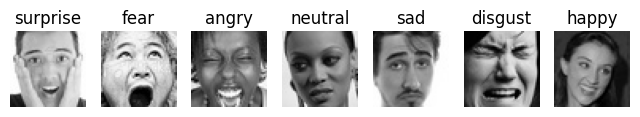

In [16]:
i = 1
plt.figure(figsize=(8,8))
for expression in os.listdir(train_data_path):
    image = load_img((train_data_path + expression) + '/' + os.listdir(train_data_path + expression)[0])
    plt.subplot(1,7,i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i = i+1
    

In [17]:
train_data_gen = ImageDataGenerator()
train_dataset = train_data_gen.flow_from_directory(train_data_path,shuffle=True,target_size=(48,48),color_mode='grayscale',class_mode='categorical',batch_size=128)

Found 28821 images belonging to 7 classes.


In [18]:
val_data_gen = ImageDataGenerator()
val_dataset = val_data_gen.flow_from_directory(val_data_path,
                                                   shuffle=False,
                                                   target_size=(48,48),
                                                   color_mode='grayscale',
                                                   class_mode='categorical',
                                                   batch_size=128)

Found 7066 images belonging to 7 classes.


In [22]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(layers.BatchNormalization())   
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))



model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu'))
model.add(layers.BatchNormalization())   
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())   
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())   
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))


model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))


model.add(layers.Dense(7,activation='softmax'))

model.summary()
    

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,311,047 (8.82 MB)

 Trainable params: 2,308,359 (8.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_dataset,validation_data=val_dataset,epochs=10,batch_size=128,verbose=1)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.2534 - loss: 1.9351 - val_accuracy: 0.4101 - val_loss: 1.5172
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.4199 - loss: 1.4859 - val_accuracy: 0.4655 - val_loss: 1.4001
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - accuracy: 0.5032 - loss: 1.2892 - val_accuracy: 0.5273 - val_loss: 1.2365
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 619s 3s/step - accuracy: 0.5500 - loss: 1.1683 - val_accuracy: 0.5153 - val_loss: 1.2618
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.5835 - loss: 1.0979 - val_accuracy: 0.5753 - val_loss: 1.1249
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 624s 3s/step - accuracy: 0.6146 - loss: 1.0228 - val_accuracy: 0.5952 - val_loss: 1.0823
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.6348 - loss: 0.9672 - val_accuracy: 0.5860 - val_loss: 1.0982
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.6563 - loss: 0.9190 - val_accuracy: 0.608

In [28]:
model.save('Face_Emotion_Classification.keras','wb')

In [29]:
model = tf.keras.models.load_model('Face_Emotion_Classification.keras')
import cv2
image = cv2.imread('/kaggle/input/angry-face/istock_000019317556large_sq-cd5341e28bd92e2bbb8dfe9f78e5130885a14d6b.jpg')[:,:,0]
image = cv2.resize(image,(48,48))
image = np.invert(np.array([image]))
output = model.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


In [30]:
np.argmax(output)

4

In [31]:
data = emotions[np.argmax(output)]
data[0]

'sad'